<a href="https://colab.research.google.com/github/manishmcsa/S4-Assigment-Solution/blob/main/S4_MNIST_99_4__accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import torch # Importing Pytorch library
import torch.nn as nn # import torch library for neyral nets
import torch.nn.functional as F # Importing torch library for performing arthmetic 
import torch.optim as optim  # implementing various optimization algorithms
import torchvision as torchvision
from torchvision import datasets, transforms # package consists of popular datasets, model architectures, and common image transformations for computer vision

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # Input : 28x28x1    Output : 28x28x16
            nn.ReLU(),                       # Input : 28x28x16    Output : 28x28x16
            nn.BatchNorm2d(16),              # Input : 28x28x16    Output : 28x28x16
            nn.Dropout(0.25),                # Input : 28x28x16    Output : 28x28x16
            nn.Conv2d(16, 16, 3, padding=1), # Input : 28x28x16    Output : 28x28x16
            nn.ReLU(),                       # Input : 28x28x16    Output : 28x28x16
            nn.BatchNorm2d(16),              # Input : 28x28x16    Output : 28x28x16
            #nn.Dropout(0.25),
            nn.Conv2d(16, 16, 3, stride=2, padding=1), # Input : 14x14x16    Output : 14x14x16
            nn.ReLU(),                                 # Input : 14x14x16    Output : 14x14x16
            nn.BatchNorm2d(16),                        # Input : 14x14x16    Output : 7x7x16
            nn.MaxPool2d(2, 2),                        # Input : 7x7x16    Output : 7x7x16
            nn.Dropout(0.25)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, padding=1),           # Input : 7x7x16     Output : 7x7x32
            nn.ReLU(),                                 # Input : 7x7x32     Output : 7x7x32
            nn.BatchNorm2d(32),                        # Input : 7x7x32     Output : 7x7x32
            nn.Dropout(0.25),                          # Input : 7x7x32     Output : 7x7x32
            nn.Conv2d(32, 32, 3, padding=1),           # Input : 7x7x32     Output : 7x7x32
            nn.ReLU(),                                 # Input : 7x7x32     Output : 7x7x32 
            nn.BatchNorm2d(32),                        # Input : 7x7x32     Output : 7x7x32
            #nn.Dropout(0.25),
            nn.Conv2d(32, 32, 3, stride=2, padding=1), # Input : 7x7x32     Output : 4x4x32
            nn.ReLU(),                                 # Input : 4x4x32     Output : 4x4x32
            nn.BatchNorm2d(32),                        # Input : 4x4x32     Output : 4x4x32
            nn.MaxPool2d(2, 2),                        # Input : 4x4x32     Output : 2x2x32
            nn.Dropout(0.25)                           # Input : 2x2x32     Output : 2x2x32
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 10, 3, padding=1),           # Input : 2x2x32     Output : 2x2x10
            nn.ReLU(),                                 # Input : 2x2x10     Output : 2x2x10
            nn.BatchNorm2d(10),                        # Input : 2x2x10     Output : 2x2x10
            #nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)                           # Input : 2x2x10     Output : 2x2x10
        )
        
        self.pool1=nn.AvgPool2d(2,2)                   # Input : 2x2x10     Output : 1x1x10
                
        
    def forward(self, x):
        x = self.conv1(x)                              # forward activation function using relu
        x = self.conv2(x)                              # forward activation function using relu
        x = self.conv3(x)                              # forward activation function using relu
        x = self.pool1(x)                              # forward activation function using relu
        x = x.view(x.size(0), -1)                      # Ouput layer
        
        x = F.log_softmax(x, dim=1)                    # Prediction from CNN loglikelyhood
        return x

In [3]:
# undesratnding and printing the network structure and summary
!pip install torchsummary # package to print model summary
from torchsummary import summary # package to print model summary
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
model=Net().to(device) #sending model to GPU
summary(model, input_size=(1, 28, 28)) # printing model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
       BatchNorm2d-3           [-1, 16, 28, 28]              32
           Dropout-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           2,320
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
            Conv2d-8           [-1, 16, 14, 14]           2,320
              ReLU-9           [-1, 16, 14, 14]               0
      BatchNorm2d-10           [-1, 16, 14, 14]              32
        MaxPool2d-11             [-1, 16, 7, 7]               0
          Dropout-12             [-1, 16, 7, 7]               0
           Conv2d-13             [-1, 32, 7, 7]           4,640
             ReLU-14             [-1, 3

In [4]:
torch.manual_seed(1)
batch_size = 128 # Initializing the batch size

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

# downloading the train data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, down load=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

# downloading the test data
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)        # mapping image and labels data to GPU
        optimizer.zero_grad()                                    # zero_grad() is to restart looping without losses from last step during training model
        output = model(data)                                     # Pass Batch for prediction
        loss = F.nll_loss(output, target)                        # Calculate Loss
        loss.backward()                                          # Calculate Gradients
        optimizer.step()                                         # Update Weights

        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)                # mapping image and labels data to GPU
            output = model(data)                                             # Batch Prediction
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)                        # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()            # Calculate number of correct predictions
    acc=(correct / len(test_loader.dataset))*100                             # Calculate accuracy
    test_loss /= len(test_loader.dataset)                                    # Calculate test loss
   
   #Printing loss and accuracy of test data
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(   
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    print(acc)
    return acc

In [6]:
model = Net().to(device)                                            # Map model to GPU
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)    # set optimizer and learning rate
Accuracy=[]                                                         # Initialize Accuracy list
for epoch in range(20):                                             # looping 20 epohs
    train(model, device, train_loader, optimizer, epoch)            # Train Model
    Acc=test(model, device, test_loader)                            # Test data predictions and validation accuracy calculation
    Accuracy.append(Acc)                                            # Appending validation Accuracy

  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0806, Accuracy: 9808/10000 (98.1%)

98.08


loss=0.14960487186908722 batch_id=0:   0%|          | 1/469 [00:00<01:31,  5.09it/s]


Test set: Average loss: 0.0487, Accuracy: 9875/10000 (98.8%)

98.75


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0377, Accuracy: 9887/10000 (98.9%)

98.87


loss=0.09386986494064331 batch_id=0:   0%|          | 1/469 [00:00<01:31,  5.12it/s]


Test set: Average loss: 0.0343, Accuracy: 9898/10000 (99.0%)

98.98


loss=0.07860592752695084 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.20it/s]


Test set: Average loss: 0.0302, Accuracy: 9909/10000 (99.1%)

99.09


loss=0.0575186088681221 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.14it/s]


Test set: Average loss: 0.0291, Accuracy: 9916/10000 (99.2%)

99.16


loss=0.03525306656956673 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.17it/s]


Test set: Average loss: 0.0283, Accuracy: 9918/10000 (99.2%)

99.18


loss=0.06135893240571022 batch_id=0:   0%|          | 1/469 [00:00<01:31,  5.14it/s]


Test set: Average loss: 0.0305, Accuracy: 9912/10000 (99.1%)

99.11999999999999


loss=0.1063770055770874 batch_id=0:   0%|          | 1/469 [00:00<01:29,  5.23it/s]


Test set: Average loss: 0.0295, Accuracy: 9915/10000 (99.2%)

99.15


loss=0.05232934653759003 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.18it/s]


Test set: Average loss: 0.0324, Accuracy: 9903/10000 (99.0%)

99.03


loss=0.053709808737039566 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.20it/s]


Test set: Average loss: 0.0276, Accuracy: 9921/10000 (99.2%)

99.21


loss=0.2015884816646576 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.17it/s]


Test set: Average loss: 0.0254, Accuracy: 9923/10000 (99.2%)

99.22999999999999


loss=0.06944452971220016 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.18it/s]


Test set: Average loss: 0.0215, Accuracy: 9941/10000 (99.4%)

99.41


loss=0.09916606545448303 batch_id=0:   0%|          | 1/469 [00:00<01:28,  5.29it/s]


Test set: Average loss: 0.0236, Accuracy: 9928/10000 (99.3%)

99.28


loss=0.03175964578986168 batch_id=0:   0%|          | 1/469 [00:00<01:29,  5.22it/s]


Test set: Average loss: 0.0240, Accuracy: 9934/10000 (99.3%)

99.33999999999999


loss=0.034721508622169495 batch_id=0:   0%|          | 1/469 [00:00<01:29,  5.23it/s]


Test set: Average loss: 0.0218, Accuracy: 9932/10000 (99.3%)

99.32


loss=0.021335873752832413 batch_id=0:   0%|          | 1/469 [00:00<01:29,  5.22it/s]


Test set: Average loss: 0.0264, Accuracy: 9924/10000 (99.2%)

99.24


loss=0.04364299774169922 batch_id=0:   0%|          | 1/469 [00:00<01:30,  5.20it/s]


Test set: Average loss: 0.0203, Accuracy: 9940/10000 (99.4%)

99.4


loss=0.05382835119962692 batch_id=0:   0%|          | 1/469 [00:00<01:31,  5.13it/s]


Test set: Average loss: 0.0226, Accuracy: 9930/10000 (99.3%)

99.3


loss=0.03570051118731499 batch_id=468: 100%|██████████| 469/469 [01:32<00:00,  5.09it/s]



Test set: Average loss: 0.0235, Accuracy: 9932/10000 (99.3%)

99.32


['98.1', '98.8', '98.9', '99.0', '99.1', '99.2', '99.2', '99.1', '99.2', '99.0', '99.2', '99.2', '99.4', '99.3', '99.3', '99.3', '99.2', '99.4', '99.3', '99.3']


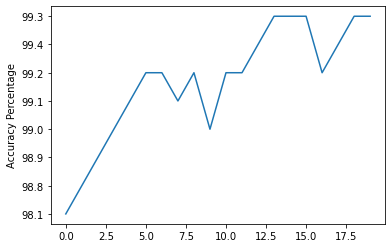

In [8]:
import matplotlib.pyplot as plt
Accuracy_list = [ '%.1f' % elem for elem in Accuracy ] # Validation accuracy to comvet into 1 decimal point
print(Accuracy_list)                                   # Printing Accuracy of test data
plt.plot(Accuracy_list)                                # Plotting Accuracy
plt.ylabel('Accuracy Percentage')                      # Labelling Y axis
plt.show()                                             # Plot graph